(206,)


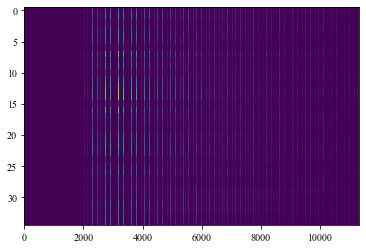


(32, 11330)
(32,)
{'copy': True, 'max_iter': 12000, 'n_components': 5, 'scale': True, 'tol': 1e-06}
Правильность на тестовом наборе: 0.82


In [57]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
string_name=[]
string_name2=[]
k=0
#создаю пространство имён для развёрнутого тензора
for i in range(len(Xdata_numpy['emission'])):
    for j in range(len(Xdata_numpy['excitation'])):
        string_name+=[str(Xdata_numpy['emission'][i])+" x "+str(Xdata_numpy['excitation'][j])]
        string_name2+=[k]
        k+=1
#создаём пространство образцов
examples_names=[]
v=[]
for i in range(0,35):
    examples_names+=[str(i)]
    v+=[i]
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

X=pd.DataFrame(Xdata_numpy['X'],index=examples_names, columns=string_name)
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     X, Ydata.iloc[:,0], test_size=0.085714 
)
print(X_train.shape)
print(y_train.shape)
s=[]

#начинаем применять
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV


pls1 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [12000], 
    'n_components': range(1,85), 
    'scale': [True,False], 
    'tol': [1e-06,1e-08,1e-07,1e-04,1e-05,1e-03,1e-046]
}
gridCought=GridSearchCV(pls1, parametrsNames, cv=5)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)



print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



In [58]:
cvres  = gridCought.cv_results_

In [59]:
filew=[]

In [75]:
for mean_score,  params  in zip(cvres [ "mean_test_score" ], 
                                cvres [ "params" ]
                                ): 
    filew+=[mean_score , params]
    print (mean_score , params) 

0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 1e-08}
0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 1e-07}
0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 0.0001}
0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 1e-05}
0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 0.001}
0.4558914890176958 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': True, 'tol': 1e-46}
-0.3697650726124901 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': False, 'tol': 1e-06}
-0.3697650726124901 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': False, 'tol': 1e-08}
-0.3697650726124901 {'copy': True, 'max_iter': 12000, 'n_components': 1, 'scale': Fals

0.29164663016429554 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': True, 'tol': 1e-46}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 1e-06}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 1e-08}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 1e-07}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 0.0001}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 1e-05}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 0.001}
0.3155318962131871 {'copy': True, 'max_iter': 12000, 'n_components': 48, 'scale': False, 'tol': 1e-46}
0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 49, 'scale': True, 'tol': 1e-06}
0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 49

0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': True, 'tol': 1e-07}
0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': True, 'tol': 0.0001}
0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': True, 'tol': 1e-05}
0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': True, 'tol': 0.001}
0.29164663016429604 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': True, 'tol': 1e-46}
0.31553189621318867 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': False, 'tol': 1e-06}
0.31553189621318867 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': False, 'tol': 1e-08}
0.31553189621318867 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': False, 'tol': 1e-07}
0.31553189621318867 {'copy': True, 'max_iter': 12000, 'n_components': 84, 'scale': False, 'tol': 0.0001}
0.31553189621318867 {'copy': True, 'max_iter': 12000, 'n_components

In [61]:
ylow=gridCought.cv_results_[ "mean_test_score" ]

In [62]:
xlow=parametrsNames[ "n_components" ]

In [63]:
xlow[6]

7

In [64]:
file=open('resoults.doc','w')

In [65]:
import codecs

In [66]:
file.writelines(digit + ' ' for digit in map(str, filew))

TypeError: memoryview: a bytes-like object is required, not 'str'

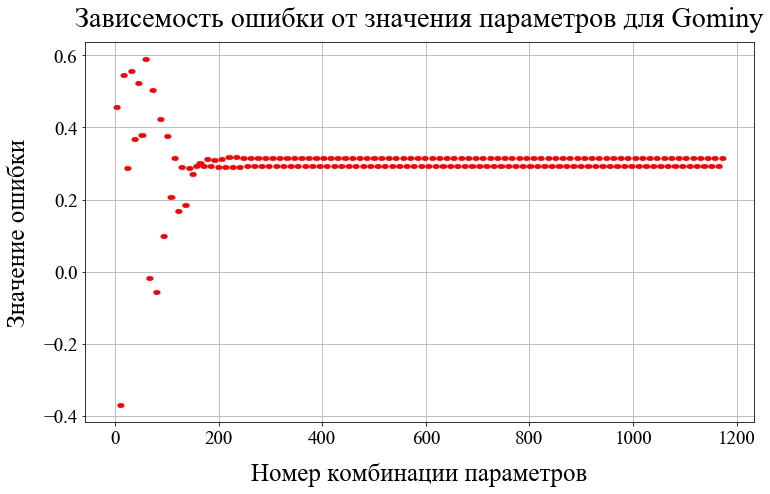

In [76]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,7))
plt.plot(ylow,".",color="red")
plt.ylabel("Значение ошибки" , fontsize=25,labelpad=12)
plt.grid()
plt.xlabel("Номер комбинации параметров",  fontsize=25,labelpad=15)
plt.title("Зависемость ошибки от значения параметров для Gominy", fontsize=28,loc="center" ,pad=15)


plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.savefig('Зависемость ошибки от параметров для PLS1.jpeg', format='jpeg', dpi=1000)
plt.show();

In [68]:
pls1.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

In [69]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: 0.82


In [70]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.59


In [71]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

2.8825853351710897


In [72]:
from  sklearn.metrics import accuracy_score
print(gridCought.accuracy_score(y_test,  predictors))

AttributeError: 'GridSearchCV' object has no attribute 'accuracy_score'

In [73]:
print(predictors)
print(y_test)

[[30.95612804]
 [45.26382314]
 [35.47856658]]
21    33.342049
15    49.409746
26    36.909160
Name: Gominy, dtype: float64


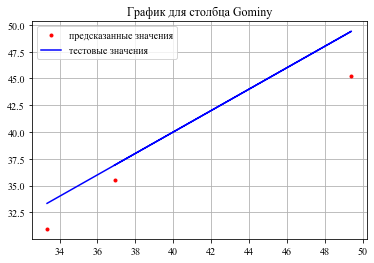

In [74]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(y_test,predictors, ".",color="red",label="предсказанные значения")
plt.plot(y_test,y_test,color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();